check alpha

In [8]:
from matplotlib import pyplot as plt
from util import problem

w = [0.2,0.3,0.9]
p = [25,3.4,3.3]
a = [1,1,1]
a0 = 2

c = [w[i]*p[i] for i in range(3)]

p = problem(w,c,a,a0)

print(p.solve_opt(debug=True))

print(p.solve_profit())



[1, 0, 0] 4.5249378105563665
[0, 1, 0] 0.8784111692252554
[1, 1, 0] 4.700273966550121
[0, 0, 1] 1.9203592616199419
[1, 0, 1] 4.712431631770032
[0, 1, 1] 2.259099612081536
[1, 1, 1] 4.680693498559613
(4.712431631770032, [1, 0, 1])
(4.700273966550121, [1, 1, 0])


change the value of a_3

1727

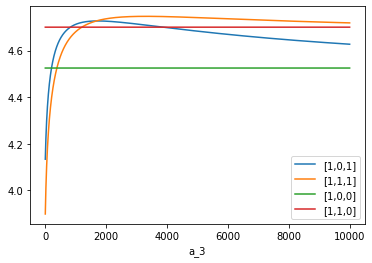

In [53]:
res = []
res1 = []
res2 = []
res3 = []
rr = []
p = problem(w,c,a,a0)
for aa in range(1,10000):
    p.alpha[2] = aa/1000
    res.append(p.solve([1,0,1]))
    res1.append(p.solve([1,1,1]))
    res2.append(p.solve([1,0,0]))
    res3.append(p.solve([1,1,0]))
    rr.append(max(res[-1],res1[-1],res2[-1],res3[-1])/max(res1[-1],res2[-1],res3[-1]))
_ = plt.plot(res, label = "[1,0,1]")
_ = plt.plot(res1,label = "[1,1,1]")
_ = plt.plot(res2,label = "[1,0,0]")
_ = plt.plot(res3,label = "[1,1,0]")
# plt.plot(rr)
plt.xlabel("a_3")
plt.legend()
res.index(max(res))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


1.0


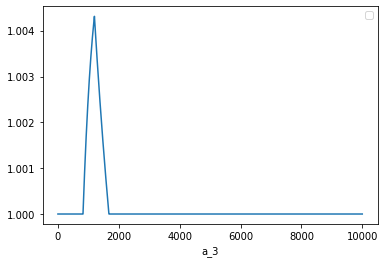

In [54]:
plt.plot(rr)
plt.xlabel("a_3")
plt.legend()
print(min(rr))


change the value of a_1

0

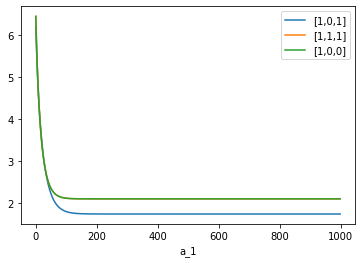

In [42]:
res = []
res1 = []
res2 = []
p = problem(w,c,a,a0)
for aa in range(1,1000):
    p.alpha[0] = aa/10
    res.append(p.solve([1,0,1]))
    res1.append(p.solve([1,1,1]))
    res2.append(p.solve([1,0,0]))
    
_ = plt.plot(res, label = "[1,0,1]")
_ = plt.plot(res1,label = "[1,1,1]")
_ = plt.plot(res2,label = "[1,0,0]")
_ = plt.plot(res3,label = "[1,1,0]")
plt.legend()
plt.xlabel("a_1")
res.index(max(res))

change the value of a_0

998

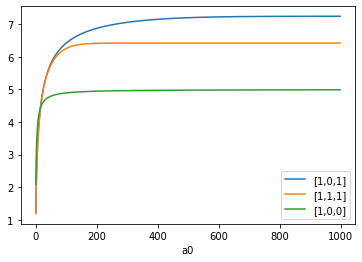

In [56]:
res = []
res1 = []
res2 = []
p = problem(w,c,a,a0)
for aa in range(1,1000):
    p.a0 = aa/10
    res.append(p.solve([1,0,1]))
    res1.append(p.solve([1,1,1]))
    res2.append(p.solve([1,0,0]))
    
_ = plt.plot(res, label = "[1,0,1]")
_ = plt.plot(res1,label = "[1,1,1]")
_ = plt.plot(res2,label = "[1,0,0]")
plt.legend()
plt.xlabel("a0")
res.index(max(res))

In [4]:
from scipy.optimize import root_scalar
from numpy import arange
b1 = 0.5
b2 = 0.5
b3 = 0.5
a2 = 2
a3 = 3

## ratio change with $\alpha_i$

In [6]:
def check(b1,b2,b3,a2,a3):
    def f1(z):
        return (b1+1)*z+ b2*(z**a2)+b3*(z**a3)-1
    def f2(z):
        return (b1)*z+ b2*(z**a2)+b3*(z**a3)-1
    z1 = root_scalar(f1, bracket=[0, 1], method='bisect').root
    z2 = root_scalar(f2, bracket=[0, 1], method='bisect').root
    # print(z1,z2)
    return z1/z2
check(b1,b2,b3,a2,a3)

0.6357199054827054

5.0000000000000036


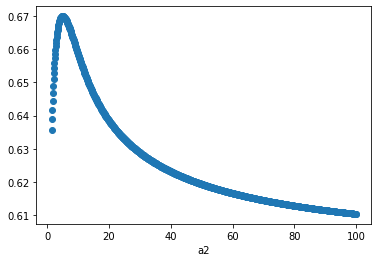

In [9]:
b1 = 0.5
b2 = 0.5
b3 = 0.5
a2 = 2
a3 = 3
a_list = []
r_list = []
for a2 in arange(1.5,100,0.1):
    r_list.append(check(b1,b2,b3,a2,a3))
    a_list.append(a2)
plt.scatter(a_list,r_list)
plt.xlabel("a2")
print(a_list[r_list.index(max(r_list))])

3.8000000000000025


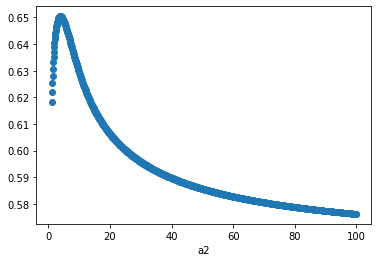

In [10]:
b1 = 0.5
b2 = 0.5
b3 = 0.5
a2 = 2
a3 = 3
a_list = []
r_list = []
for a3 in arange(1.1,100,0.1):
    r_list.append(check(b1,b2,b3,a2,a3))
    a_list.append(a3)
plt.scatter(a_list,r_list)
plt.xlabel("a2")
print(a_list[r_list.index(max(r_list))])